In [2]:
import os, shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/home/stephen/Scripts/Books/DeepLearningChollet/Ch5-CNN/kaggle_original_data'

# The directory where we will
# store our smaller dataset
base_dir = '/home/stephen/Scripts/Books/DeepLearningChollet/Ch5-CNN/cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [7]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

In [8]:
# Use Keras Preprocessing ImageDataGenerator to perform necessary pre-processing
from keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,  # This is the target directory
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=20,
    class_mode='binary')  # Since we use binary_crossentropy loss, we need binary labels
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# Need to use fit_generator since we are using the ImageDataGenerator
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)  # Generator yields batches of validation data endlessly. Tell it when to stop.

Epoch 1/30
100/100 [==============================] - 8s 81ms/step - loss: 0.6883 - acc: 0.5375 - val_loss: 0.6675 - val_acc: 0.6090
Epoch 2/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6548 - acc: 0.6185 - val_loss: 0.6449 - val_acc: 0.6440
Epoch 3/30
100/100 [==============================] - 5s 53ms/step - loss: 0.6190 - acc: 0.6670 - val_loss: 0.7322 - val_acc: 0.5430
Epoch 4/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5797 - acc: 0.7005 - val_loss: 0.5803 - val_acc: 0.6930
Epoch 5/30
100/100 [==============================] - 5s 53ms/step - loss: 0.5352 - acc: 0.7345 - val_loss: 0.5791 - val_acc: 0.6870
Epoch 6/30
100/100 [==============================] - 5s 54ms/step - loss: 0.5131 - acc: 0.7465 - val_loss: 0.5661 - val_acc: 0.7030
Epoch 7/30
100/100 [==============================] - 5s 54ms/step - loss: 0.4779 - acc: 0.7690 - val_loss: 0.6594 - val_acc: 0.6650
Epoch 8/30
100/100 [==============================] - 5s 54ms/step - 

In [10]:
# Save data as h5 file.
model.save('cats_and_dogs_small_1.h5')

In [11]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

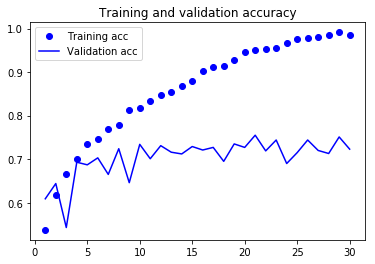

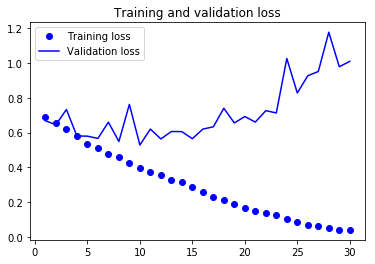

In [13]:
# Show Loss and Accuracy during Training
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
# Above plots indicate overfitting.
# Can augment data using ImageDataGenerator to produce random transformations.
datagen = ImageDataGenerator(
    rotation_range=40,  # Value in degrees to randomly rotate.
    width_shift_range=0.2,  # fraction of total width to translate pictures horizontally.
    height_shift_range=0.2,  # fraction of total height to translate pictures vertically.
    shear_range=0.2,  # randomly apply shear transformations.
    zoom_range=0.2,  # randomly zoom inside pictures.
    horizontal_flip=True,  # randomly flip image horizontally
    fill_mode='nearest')  # strategy used for filling newly created pixels during rotation/shift.

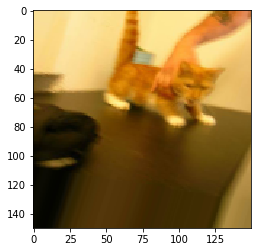

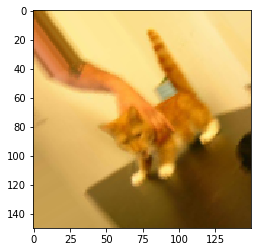

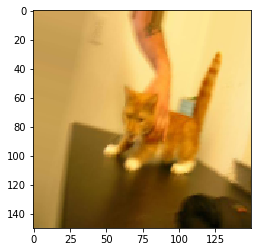

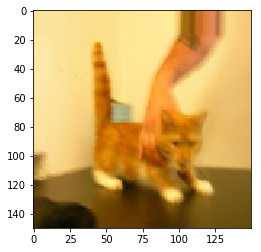

In [15]:
# Display some randomly augmented pictures.
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [16]:
# Define new convnet with dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

In [17]:
# Train convnet using data augmentation generators.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,  # This is the target directory
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=32,
    class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 18s 184ms/step - loss: 0.6914 - acc: 0.5294 - val_loss: 0.6820 - val_acc: 0.5820
Epoch 2/100
100/100 [==============================] - 17s 170ms/step - loss: 0.6838 - acc: 0.5550 - val_loss: 0.6656 - val_acc: 0.5810
Epoch 3/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6713 - acc: 0.5919 - val_loss: 0.6430 - val_acc: 0.6400
Epoch 4/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6552 - acc: 0.6134 - val_loss: 0.6507 - val_acc: 0.5880
Epoch 5/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6299 - acc: 0.6363 - val_loss: 0.6386 - val_acc: 0.6280
Epoch 6/100
100/100 [==============================] - 18s 175ms/step - loss: 0.6227 - acc: 0.6597 - val_loss: 0.5937 - val_acc: 0.6650
Epoch 7/100
100/100 [==============================] - 17s 170ms/step - loss: 0.6097 - acc: 0.6569 -

100/100 [==============================] - 17s 166ms/step - loss: 0.4124 - acc: 0.8106 - val_loss: 0.4533 - val_acc: 0.7980
Epoch 61/100
100/100 [==============================] - 17s 170ms/step - loss: 0.4189 - acc: 0.8081 - val_loss: 0.4444 - val_acc: 0.7890
Epoch 62/100
100/100 [==============================] - 17s 166ms/step - loss: 0.4206 - acc: 0.8084 - val_loss: 0.4523 - val_acc: 0.7840
Epoch 63/100
100/100 [==============================] - 17s 168ms/step - loss: 0.4171 - acc: 0.8122 - val_loss: 0.4483 - val_acc: 0.8050
Epoch 64/100
100/100 [==============================] - 17s 168ms/step - loss: 0.4265 - acc: 0.8034 - val_loss: 0.4533 - val_acc: 0.7930
Epoch 65/100
100/100 [==============================] - 17s 171ms/step - loss: 0.4136 - acc: 0.8103 - val_loss: 0.4820 - val_acc: 0.7790
Epoch 66/100
100/100 [==============================] - 17s 168ms/step - loss: 0.4111 - acc: 0.8075 - val_loss: 0.4353 - val_acc: 0.8030
Epoch 67/100
100/100 [==============================] 

In [18]:
model.save('cats_and_dogs_small_2.h5')

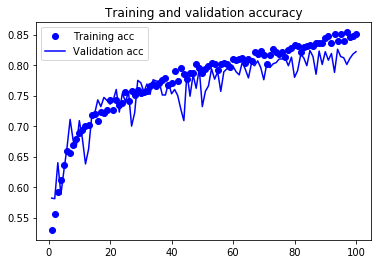

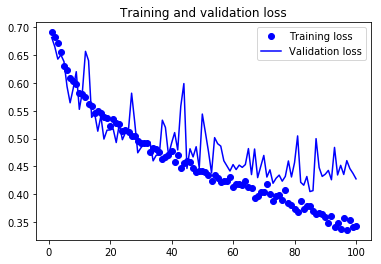

In [19]:
# Show Loss and Accuracy during Training
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
# Use pre-trained VGG16 convnet
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 4s 0us/step


In [21]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [22]:
# Extract features using pre-trained conv base
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/home/stephen/Scripts/Books/DeepLearningChollet/Ch5-CNN/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        
        i += 1
        
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                loss='binary_crossentropy',
                metrics=['acc'])

history = model.fit(train_features, train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 425us/step - loss: 0.5784 - acc: 0.6780 - val_loss: 0.4323 - val_acc: 0.8320
Epoch 2/30
2000/2000 [==============================] - 1s 278us/step - loss: 0.4211 - acc: 0.8020 - val_loss: 0.3602 - val_acc: 0.8630
Epoch 3/30
2000/2000 [==============================] - 1s 263us/step - loss: 0.3624 - acc: 0.8410 - val_loss: 0.3259 - val_acc: 0.8710
Epoch 4/30
2000/2000 [==============================] - 1s 287us/step - loss: 0.3250 - acc: 0.8620 - val_loss: 0.3046 - val_acc: 0.8770
Epoch 5/30
2000/2000 [==============================] - 1s 285us/step - loss: 0.2978 - acc: 0.8675 - val_loss: 0.2954 - val_acc: 0.8770
Epoch 6/30
2000/2000 [==============================] - 1s 280us/step - loss: 0.2638 - acc: 0.8980 - val_loss: 0.2771 - val_acc: 0.8850
Epoch 7/30
2000/2000 [==============================] - 1s 274us/step - loss: 0.2523 - acc: 0.9035 - val_loss: 0.2674 - val_acc: 0.8910


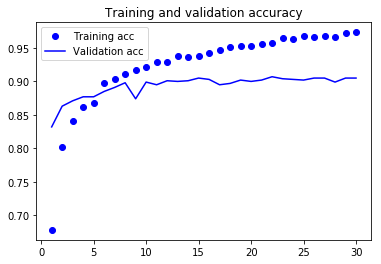

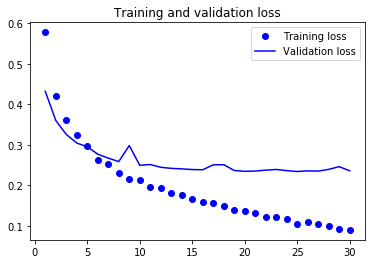

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
# Still overfitting since we aren't using data augmentation.
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [28]:
# We need to freeze the conv_base so their weights are not updated during training
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_basesease.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,  # This is the target directory
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=20,
    class_mode='binary')  # Since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

In [30]:
# Visualizing what Convnets Learn
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [31]:
# Preprocess a single image
img_path = '/home/stephen/Scripts/Books/DeepLearningChollet/Ch5-CNN/cats_and_dogs_small/test/cats/cat.1700.jpg'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


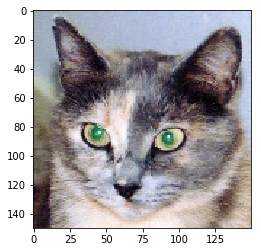

In [32]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])

In [33]:
# Instantiate a model from an input tensor and list of output tensors
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [34]:
# Run our model in "predict" mode

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [35]:
# Get the first layer activation shape
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


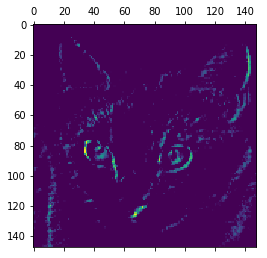

In [36]:
# Plot the fourth channel of the activation of the first layer of the original model
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

# this appears to be a diagonal edge detector

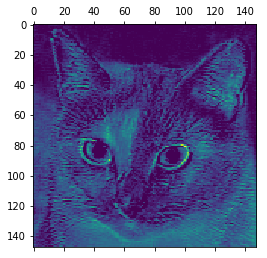

In [37]:
# Plot the seventh channel of the activation of the first layer of the original model
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

/home/stephen/python/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


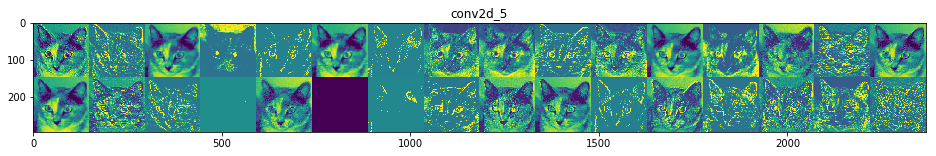

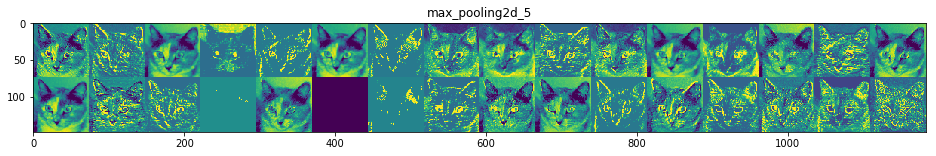

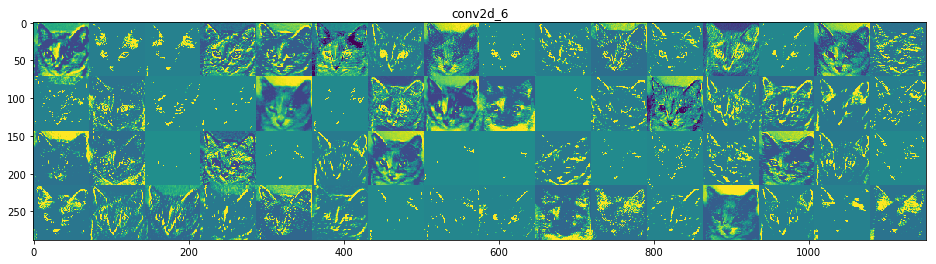

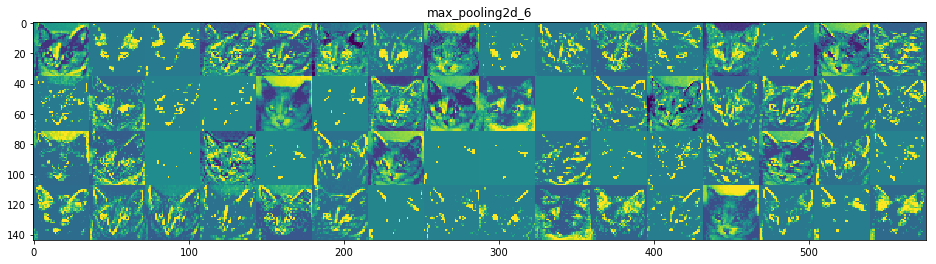

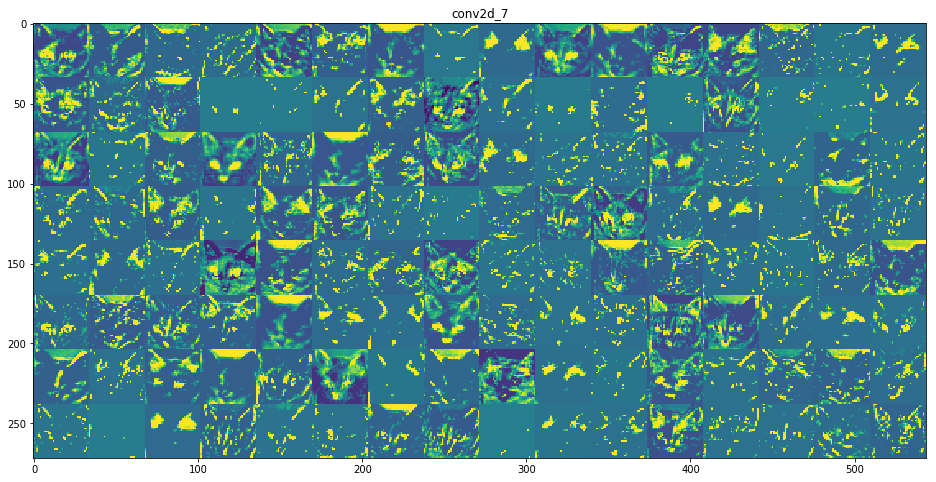

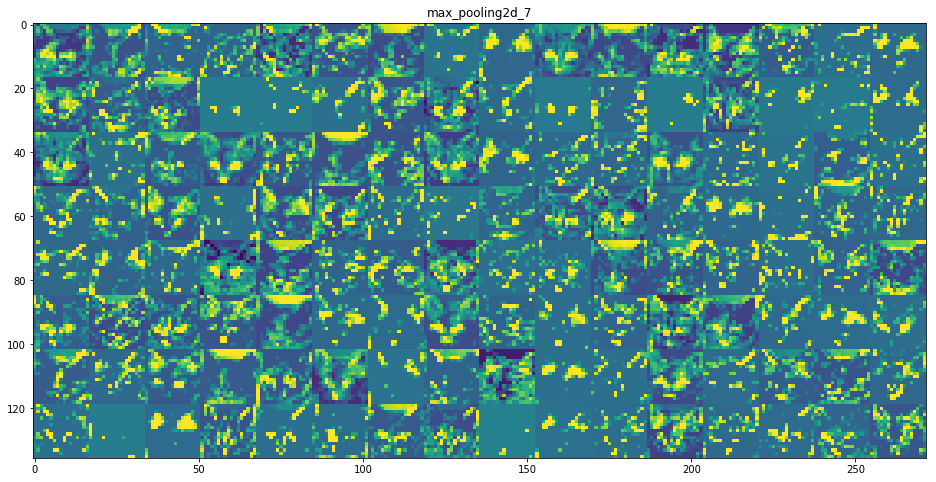

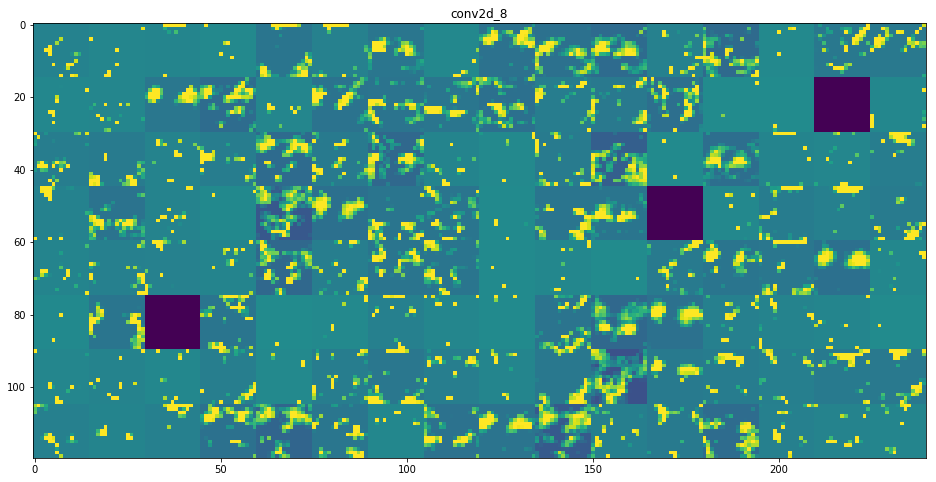

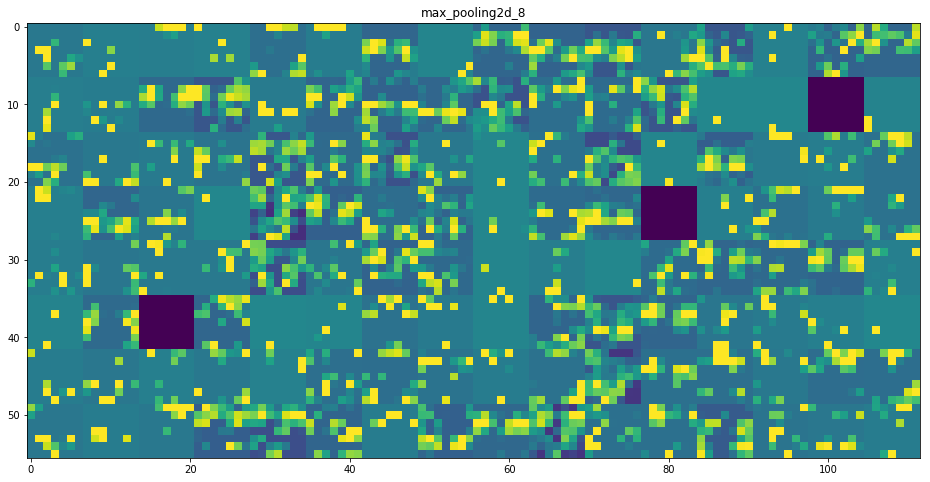

In [39]:
# Visualize every channel in every intermediate activation

# These are the names of the layers, so can have them as part of our plot
layer_names = []

for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    
    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]
    
    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                            :, :,
                                            col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                        row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [40]:
# Defining the loss tensor for filter visualization
from keras.applications import VGG16
from keras import backend as K
model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [41]:
# The call to `gradients` returns a list of tensors (of size 1 in this case)
# hence we only keep the first element -- which is a tensor.
grads = K.gradients(loss, model.input)[0]

# We add 1e-5 before dividing so as to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [42]:
# Define a Keras function for fetching Numpy output values given Numpy input values
iterate = K.function([model.input], [loss, grads])

# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [43]:
# Loss maximization via stochastic gradient descent over the input parameters
# We start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1. # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

In [44]:
# Utility to convert tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    
    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [45]:
# Function to generate filter visualizations
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]
    
    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    
    img = input_img_data[0]
    return deprocess_image(img)

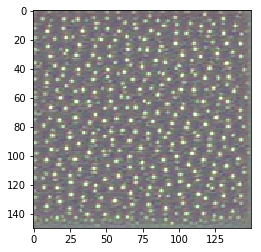

In [46]:
# Visualize response patterns of filter 0 of block3_conv1
plt.imshow(generate_pattern('block3_conv1', 0))

# This is responsive to a polka dot pattern

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


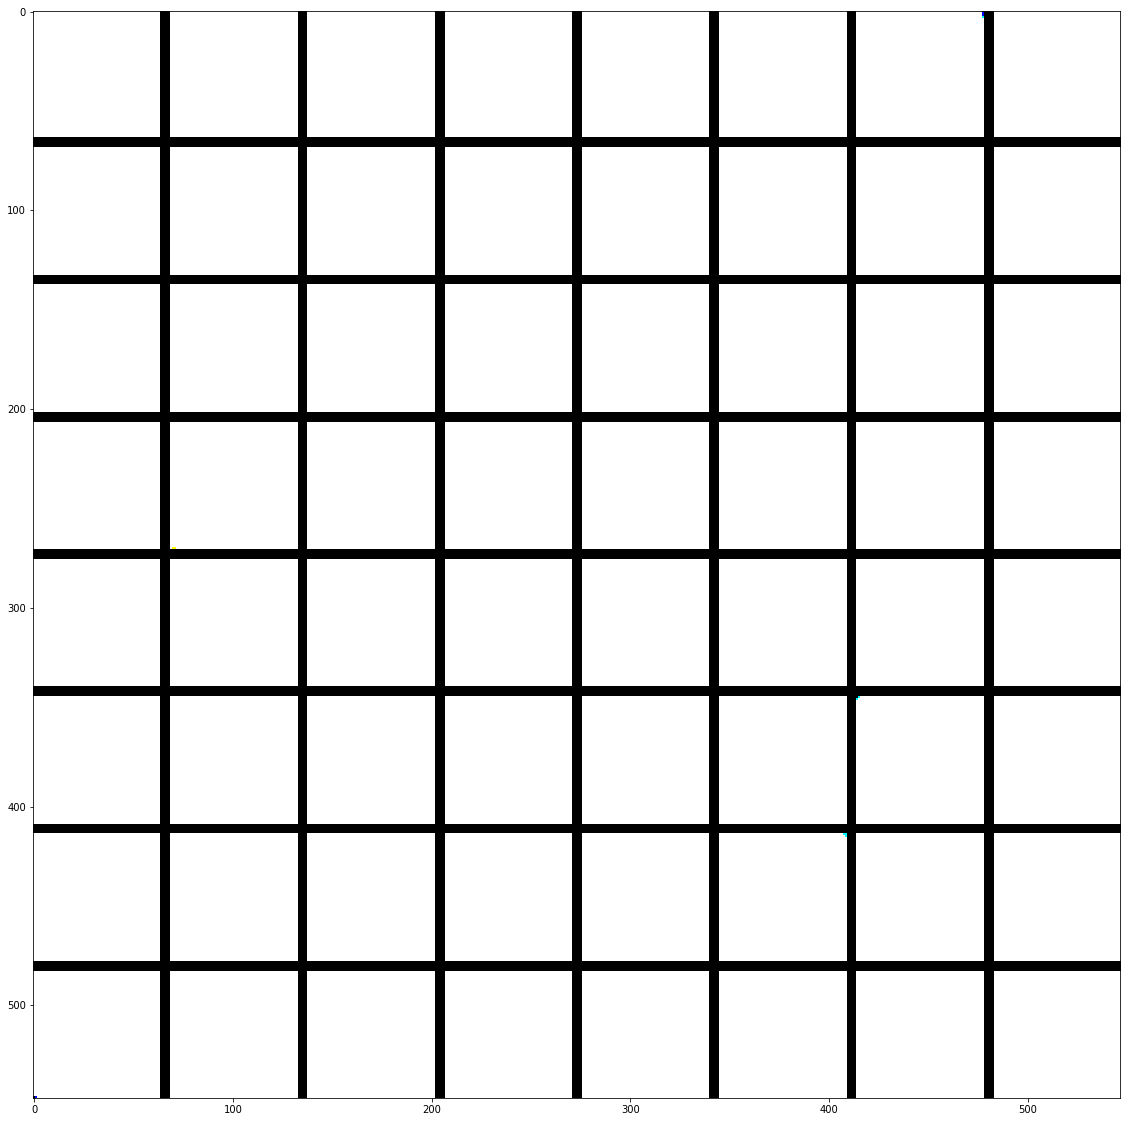

In [58]:
# Visualize the first 64 filters in each layer and only look at first layer of each conv block
layer_name = 'block1_conv1'
size = 64
margin = 5

# This a empty (black) image where we will store our results.
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8): # iterate over the rows of our results grid
    for j in range(8): # iterate over the columns of our results grid
        # Generate the pattern for filter `i + (j * 8)` in `layer_name`
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        
        # Put the result in the square `(i, j)` of the results grid
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
        
# Display the results grid
plt.figure(figsize=(20, 20))
plt.imshow(results)

In [59]:
# Visualize heatmaps of class activations
from keras.applications.vgg16 import VGG16
# Note that we are including the densely-connected classifier on top;
# all previous times, we were discarding it.
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 46s 0us/step


In [61]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
# The local path to our target image
img_path = '/home/stephen/Scripts/Books/DeepLearningChollet/Ch5-CNN/creative_commons_elephant.jpg'
# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))
# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)
# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [62]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 1us/step
Predicted: [('n02504458', 'African_elephant', 0.88955486), ('n01871265', 'tusker', 0.10269042), ('n02504013', 'Indian_elephant', 0.007253822)]


In [63]:
# Max prediction
np.argmax(preds[0])

386

In [64]:
# Grad-CAM algorithm
# This is the "african elephant" entry in the prediction vector
african_elephant_output = model.output[:, 386]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model.get_layer('block5_conv3')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (512,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `block5_conv3`,
# given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the elephant class
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

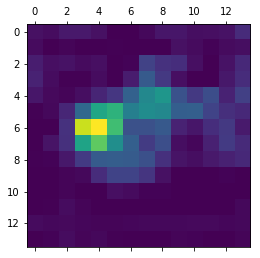

In [65]:
# Heatmap post-processing
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [66]:
# Superimpose hatmap to image

import cv2
# We use cv2 to load the original image
img = cv2.imread(img_path)
# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap * 0.4 + img
# Save the image to disk
cv2.imwrite('/home/stephen/Scripts/Books/DeepLearningChollet/Ch5-CNN/elephant_cam.jpg', superimposed_img)

True